# Roadmap figure

In [2]:
import pathlib

In [3]:
import matplotlib.pyplot as plt
from pycqed.analysis.tools.plotting import set_axeslabel_color
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

## Manual Data entry of milestones

In [4]:
today = datetime.today()

In [103]:
# A dict with "milestone": date
ms = []

types=['Company', 'Product', 'Service', 'Technology']

ms.append(["", '2020-04-20', 'Company'])
ms.append(["", '2020-04-20', 'Product'])
ms.append(["", '2020-04-20', 'Service'])
ms.append(["", '2020-04-20', 'Technology'])


ms.append(["", '2030-04-20', 'Technology'])
ms.append(["", '2030-04-20', 'Product'])



ms.append(["OQS publically announded", '2020-04-20', 'Company'])
ms.append(["OQS founded", '2020-09-07', 'Company'])
# ms.append(["Annual General Meeting", '2020-11-26', 'Company'])
ms.append(["Preliminary VTT tender proposal", '2020-07-31', 'Technology'])
ms.append(["MIT Quantify proposal", '2020-09-10', 'Technology'])
# ms.append(["Quantify Consortium agreement", '2020-10-14', 'Technology'])
ms.append(["First release Quantify", '2020-10-16', 'Technology'])
ms.append(["Final VTT tender proposal", '2020-10-20', 'Technology'])
ms.append(["Start of the kilo-qubit project", '2020-12-01', 'Technology'])
ms.append(["Quantify v1.0", '2021-02-01', 'Technology'])
ms.append(["APS March Meeting Single-qubit demonstrator", '2021-03-15', 'Technology'])

ms.append(["5-qubit demonstrator", '2021-07-01', 'Technology'])
ms.append(["Basic characterization automated", '2021-12-01', 'Technology'])
ms.append(["Quantify v2.0", '2021-12-31', 'Technology'])




ms.append(["Demonstrator",                     '2021-07-01', 'Product'])
ms.append(["Device Development Platform",      '2022-06-30', 'Product'])
ms.append(["Algorithm Development Platform",   '2022-12-31', 'Product'])
ms.append(["Customized Quantum Computer",      '2025-06-30', 'Product'])
ms.append(["Engineering support", '2020-09-01', 'Service'])
ms.append(["Custom control software", '2021-02-01', 'Service'])
ms.append(["Device characterization and certification", '2021-12-31', 'Service'])
# ms.append(["First fully-featured  Quantify", '2021-02-01', 'Product'])




ms = pd.DataFrame(ms, columns=['Milestone', 'date', 'type of milestone'])
ms['date'] = [datetime.strptime(d, "%Y-%m-%d") for d in ms['date']]

# ms

In [104]:
ms.to_csv('201123_milestones.csv')

## Plot milestones function definition

In [19]:



def plot_milestones(dataframe, f=None, ax=None, ticker=3, sign=1, main_color='black'):
    dataframe = dataframe.sort_values('date')
    names = dataframe['Milestone']

    dates =      dataframe['date']
    types=['Company', 'Product', 'Service', 'Technology']
    
    
    colors = ['C1', 'C1', 'C0', 'C1']
    colormap = dict(zip(types, colors))

    levels = np.arange(len(dates))*sign

    # Create figure and plot a stem plot with the date
    if ax is None and f is None:
        f, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    f.patch.set_alpha(0)
    ax.patch.set_alpha(0)



    ax.vlines(dates, 0, levels, color=[colormap[t] for t in dataframe['type of milestone']])  # The vertical stems.

    ax.plot(dates, np.zeros_like(dates), "-o",
        color=main_color, markerfacecolor="w")  # Baseline and markers on it.

    # annotate lines
    for d, l, r in zip(dates, levels, names):
        ax.annotate(r, xy=(d, l),
                    xytext=(-3, np.sign(l)*3), textcoords="offset points",
                    color=main_color,
                    horizontalalignment="right",
                    verticalalignment="bottom" if l > 0 else "top")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=ticker))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_color(main_color)

    ax.set_xlim('2020-04-01', '2022-01-01')
    ax.margins(y=0.1)
    return f, ax


## Loading milestone data from .csv

In [25]:
ms = pd.read_csv('milestones.csv')
ms['date'] = ms['date'].apply(lambda d: datetime.strptime(d, "%d/%m/%Y"))
ms = ms.sort_values('date')
ms

,Milestone,date,type of milestone,notes
0,OQS publically announded,2020-04-20,Company,NaN
17,first commit quantify,2020-04-21,Technology,Project start
18,quantify v0.1.0,2020-05-20,Technology,first prototype
19,quantify v0.1.1,2020-05-25,Technology,NaN
2,Preliminary VTT tender proposal,2020-07-31,Technology,NaN
13,Engineering support,2020-09-01,Service,NaN
1,OQS founded,2020-09-07,Company,NaN
3,MIT Quantify proposal,2020-09-10,Technology,NaN
20,quantify-core v0.2.0,2020-10-16,Technology,core and scheduler split into separate repos
4,Final VTT tender proposal,2020-10-20,Technology,NaN


## Select only specific types of milestones

In [26]:
# ms[ms['type of milestone'].isin(['Product', 'Service'])]


### Figure quantify roadmap

In [27]:
import os
# os.makedirs('roadmap_figs')

In [28]:
td = datetime.today()
ms_qf = ms[['quantify' in m for m in ms['Milestone']]]

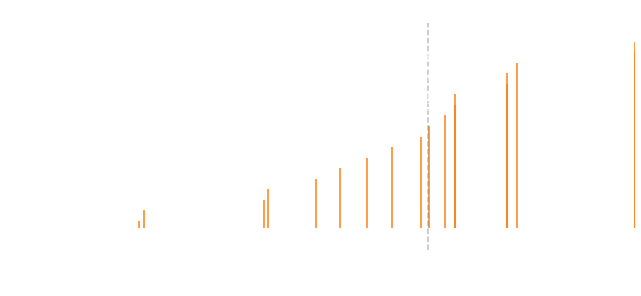

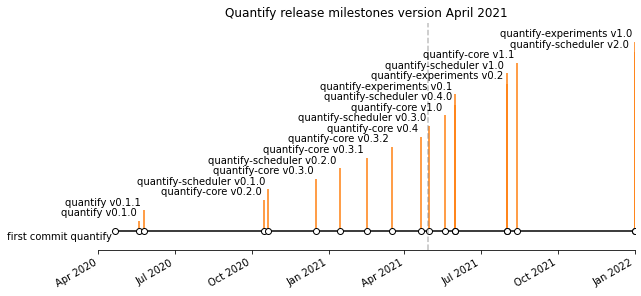

In [30]:
for mc  in ['white', 'black']:
    f, ax = plot_milestones(ms_qf, ticker=3, main_color=mc)
    ax.set(title=f"Quantify release milestones version {td.strftime('%B %Y')}")
    ax.axvline(x=datetime.today(), ls='--', c='grey', alpha=.5)
    set_axeslabel_color(ax, mc)
    for fmt in ['png', 'svg']:
        fn = pathlib.Path('roadmap_figs', f"quantify_releases_v2_{td.strftime('%b%y')}{mc}.{fmt}")
        f.savefig(fn)

#### Quantify roadmap core only

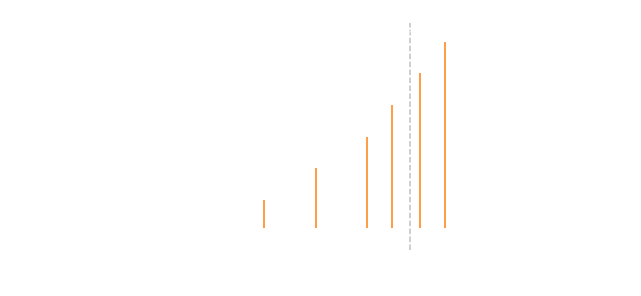

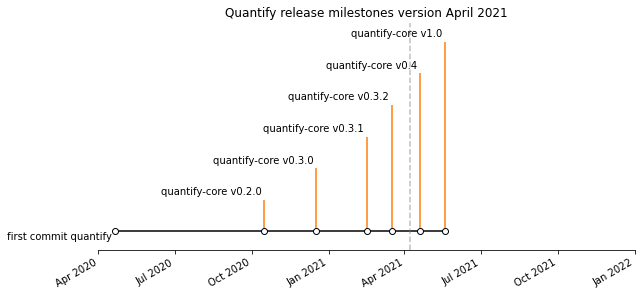

In [247]:
ms_qf = ms[[('quantify-core' in m) or ('first commit quantify' in m) for m in ms['Milestone']]]

ms_qf
for mc  in ['white', 'black']:
    f, ax = plot_milestones(ms_qf, ticker=3, main_color=mc)
    ax.set(title=f"Quantify release milestones version {td.strftime('%B %Y')}")
    ax.axvline(x=datetime.today(), ls='--', c='grey', alpha=.5)
    set_axeslabel_color(ax, mc)
    for fmt in ['png', 'svg']:
        fn = pathlib.Path('roadmap_figs', f"quantify_releases_core_only_v{td.strftime('%b%y')}{mc}.{fmt}")
        f.savefig(fn)

#### Quantify roadmap scheduler only 

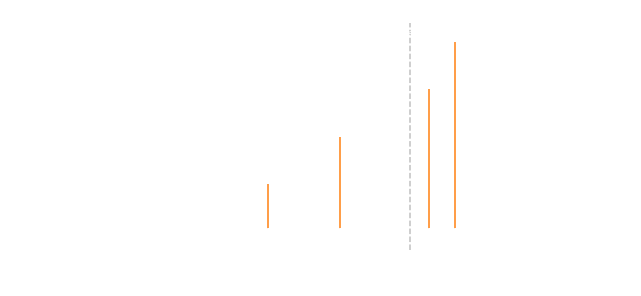

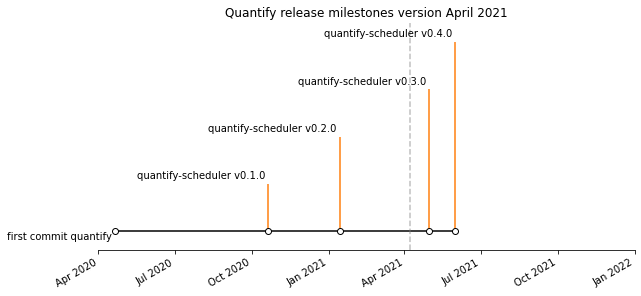

In [248]:
ms_qf = ms[[('quantify-scheduler' in m) or ('first commit quantify' in m) for m in ms['Milestone']]]

ms_qf
for mc  in ['white', 'black']:
    f, ax = plot_milestones(ms_qf, ticker=3, main_color=mc)
    ax.set(title=f"Quantify release milestones version {td.strftime('%B %Y')}")
    ax.axvline(x=datetime.today(), ls='--', c='grey', alpha=.5)
    set_axeslabel_color(ax, mc)
    for fmt in ['png', 'svg']:
        fn = pathlib.Path('roadmap_figs', f"quantify_releases_scheduler_only_v{td.strftime('%b%y')}{mc}.{fmt}")
        f.savefig(fn)

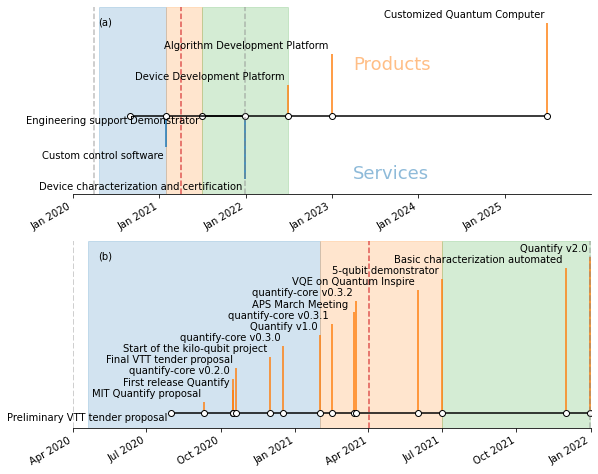

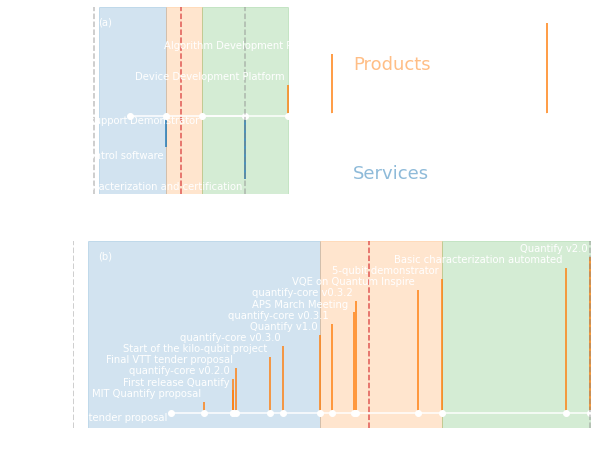

In [110]:

from matplotlib.patches import ConnectionPatch
for main_color in ['black', 'white']:

    f =plt.figure(figsize=(8, 6.5))
    ax0 = f.add_axes([.05, .55, .9, .4])
    ax1 = f.add_axes([.05, .05, .9, .4])
    f, ax0 = plot_milestones(ms[ms['type of milestone'].isin(['Product'])], ticker=12, f=f, ax=ax0, main_color=main_color)
    f, ax0 = plot_milestones(ms[ms['type of milestone'].isin(['Service'])], ticker=12, f=f, ax=ax0, sign=-1, main_color=main_color)
    ax0.set_xlim('2020-01-01', '2025-12-31')

    f, ax1 = plot_milestones(ms[ms['type of milestone'].isin(['Technology'])], ticker=3, f=f, ax=ax1, main_color=main_color)

    # ax0.set(title="Products & Services Roadmap 2020 - 2025")
    # ax1.set(title="Technical Milestones 2020 - 2021")

    xcurr = datetime.today()
    ax0.axvline(x=xcurr, ls='--', c='C3', alpha=.75)
    ax1.axvline(x=xcurr, ls='--', c='C3', alpha=.75)
    # xcurr = datetime.strptime('2020-11-23', "%Y-%m-%d")
    
    con = ConnectionPatch(xyA=(xcurr,-3.7), xyB=(xcurr, 12.1),
                          coordsA="data", coordsB="data", 
                          axesA=ax0, axesB=ax1, ls='--', color='C3', alpha=.5)
    ax0.add_artist(con)



    ax0.text(datetime.strptime('2023-04-01', "%Y-%m-%d"), 1.5, 'Products', color='C1', alpha=.5, fontsize=18)

    ax0.text(datetime.strptime('2023-04-01', "%Y-%m-%d"), -2, 'Services', color='C0', alpha=.5, fontsize=18)

    x0 = datetime.strptime('2020-04-01', "%Y-%m-%d")
    con = ConnectionPatch(xyA=(x0,-3.7), xyB=(x0, 12.1),
                          coordsA="data", coordsB="data", 
                          axesA=ax0, axesB=ax1, ls='--', color='grey', alpha=.5)
    ax0.add_artist(con)

    x1 = datetime.strptime('2021-12-31', "%Y-%m-%d")
    con = ConnectionPatch(xyA=(x1,-3.7), xyB=(x1, 12.1),
                          coordsA="data", coordsB="data", 
                          axesA=ax0, axesB=ax1, ls='--', color='grey', alpha=.5)
    ax0.add_artist(con)
    ax0.axvline(x=x0, ls='--', c='grey', alpha=.5)
    ax1.axvline(x=x0, ls='--', c='grey', alpha=.5)
    ax0.axvline(x=x1, ls='--', c='grey', alpha=.5)
    ax1.axvline(x=x1, ls='--', c='grey', alpha=.5)

    ax0.text(0.05, .9, '(a)', transform =ax0.transAxes, color=main_color)
    ax1.text(0.05, .9, '(b)', transform =ax1.transAxes, color=main_color)



    ax0.axvspan('2020-04-20', '2021-02-01', alpha=0.2, color='C0')
    ax0.axvspan('2021-02-01', '2021-07-01', alpha=0.2, color='C1')
    ax0.axvspan('2021-07-01', '2022-06-30', alpha=0.2, color='C2')

    ax1.axvspan('2020-04-20', '2021-02-01', alpha=0.2, color='C0')
    ax1.axvspan('2021-02-01', '2021-07-01', alpha=0.2, color='C1')
    ax1.axvspan('2021-07-01', '2022-06-30', alpha=0.2, color='C2')
    set_axeslabel_color(ax0, main_color)
    set_axeslabel_color(ax1, main_color)
    if main_color=='black':
        f.savefig('Milestones_combined.svg', bbox_inches='tight')
    elif main_color=='white':
        f.savefig('Milestones_combined_w.svg', bbox_inches='tight')

In [119]:
try: 
    print('hello')
    raise KeyboardInterrupt
except Exception:
    print('no')

hello


KeyboardInterrupt: 